In [1]:
#doing all the imports and downloads done previously
import pandas as pd
import numpy as np 
from numpy.random import RandomState
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('C:/Users/Shahroze/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
train, test = train_test_split(data, test_size=0.3)
print("\nTrain:\n")
print(train.head())
print(train.shape)

print("\nTest:\n")
print(test.head())
print(test.shape)


Train:

            Date        Open        High         Low       Close   Adj Close  \
273   2011-07-28   27.600000   28.549999   27.540001   28.170000   28.170000   
382   2012-01-03   28.940001   29.500000   27.650000   28.080000   28.080000   
697   2013-04-08   41.970001   42.549999   41.509998   41.830002   41.830002   
1136  2015-01-02  222.869995  223.250000  213.259995  219.309998  219.309998   
1113  2014-11-28  245.350006  246.690002  242.520004  244.520004  244.520004   

       Volume  
273    938700  
382    928100  
697   1679000  
1136  4764400  
1113  2119700  
(1691, 7)

Test:

            Date        Open        High         Low       Close   Adj Close  \
186   2011-03-24   22.139999   22.379999   21.980000   22.330000   22.330000   
1816  2017-09-14  364.329987  377.959991  362.630005  377.640015  377.640015   
2024  2018-07-13  315.579987  319.579987  309.250000  318.869995  318.869995   
284   2011-08-12   25.600000   27.139999   25.360001   26.309999   26.309999

In [4]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [5]:
df = pd.read_csv('C:/Users/Shahroze/train.csv')
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-07-28,27.600000,28.549999,27.540001,28.170000,28.170000,938700
1,2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
2,2013-04-08,41.970001,42.549999,41.509998,41.830002,41.830002,1679000
3,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
4,2014-11-28,245.350006,246.690002,242.520004,244.520004,244.520004,2119700


In [6]:
dg = pd.read_csv('C:/Users/Shahroze/test.csv')
dg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-24,22.139999,22.379999,21.980000,22.330000,22.330000,462200
1,2017-09-14,364.329987,377.959991,362.630005,377.640015,377.640015,7202500
2,2018-07-13,315.579987,319.579987,309.250000,318.869995,318.869995,5869800
3,2011-08-12,25.600000,27.139999,25.360001,26.309999,26.309999,1009100
4,2013-07-29,129.320007,135.369995,128.250000,134.619995,134.619995,9678900


In [7]:
#Changing the Close variable from an object to a float value
df["Close"] = pd.to_numeric(data.Close,errors='coerce')
df = df.dropna()
traindf = df.iloc[:,4:5].values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1691 non-null   object 
 1   Open       1691 non-null   float64
 2   High       1691 non-null   float64
 3   Low        1691 non-null   float64
 4   Close      1691 non-null   float64
 5   Adj Close  1691 non-null   float64
 6   Volume     1691 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.6+ KB


In [9]:
#rescaling data to make sure  it's easier to handle 
sc = MinMaxScaler(feature_range=(0,1))
traindf = sc.fit_transform(traindf)
traindf.shape

(1691, 1)

In [10]:
#Preparing data for training
#the lenght of the data is 1691 while the steps taken 60
X_train = []
y_train = []

for m in range (60,1691): 
    X_train.append(traindf[m-60:m,0])
    y_train.append(traindf[m,0])

X_train, y_train = np.array(X_train),np.array(y_train)

In [11]:
#addding the batch size to allow the model to be updated after the varying smaple processes
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1631, 60, 1)

In [12]:
#building a model containing 4 layers of LSTM network with 4 layers of network and the dense layer
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [13]:
#Training our model Close
hist = model.fit(X_train, y_train, epochs = 20, batch_size =32, verbose=2)

Epoch 1/20
51/51 - 11s - loss: 0.0286 - 11s/epoch - 206ms/step
Epoch 2/20
51/51 - 4s - loss: 0.0049 - 4s/epoch - 85ms/step
Epoch 3/20
51/51 - 4s - loss: 0.0044 - 4s/epoch - 85ms/step
Epoch 4/20
51/51 - 4s - loss: 0.0046 - 4s/epoch - 81ms/step
Epoch 5/20
51/51 - 4s - loss: 0.0039 - 4s/epoch - 82ms/step
Epoch 6/20
51/51 - 4s - loss: 0.0040 - 4s/epoch - 86ms/step
Epoch 7/20
51/51 - 4s - loss: 0.0034 - 4s/epoch - 85ms/step
Epoch 8/20
51/51 - 4s - loss: 0.0034 - 4s/epoch - 84ms/step
Epoch 9/20
51/51 - 4s - loss: 0.0039 - 4s/epoch - 84ms/step
Epoch 10/20
51/51 - 4s - loss: 0.0033 - 4s/epoch - 87ms/step
Epoch 11/20
51/51 - 4s - loss: 0.0033 - 4s/epoch - 85ms/step
Epoch 12/20
51/51 - 4s - loss: 0.0038 - 4s/epoch - 85ms/step
Epoch 13/20
51/51 - 4s - loss: 0.0030 - 4s/epoch - 86ms/step
Epoch 14/20
51/51 - 4s - loss: 0.0031 - 4s/epoch - 87ms/step
Epoch 15/20
51/51 - 4s - loss: 0.0029 - 4s/epoch - 86ms/step
Epoch 16/20
51/51 - 4s - loss: 0.0028 - 4s/epoch - 86ms/step
Epoch 17/20
51/51 - 4s - loss:

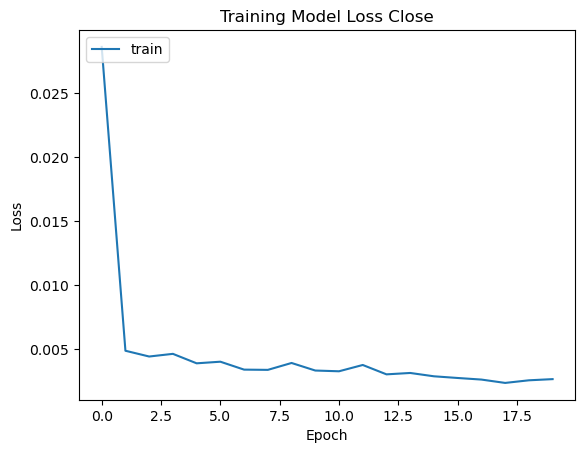

In [23]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss Close')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
#Running the model under Test
#importing dataset
testdf = pd.read_csv('C:/Users/Shahroze/test.csv')
testdf["Close"]=pd.to_numeric(testdf.Close,errors='coerce')
testdf =testdf.dropna()
testdf = testdf.iloc[:,4:5]
y_test = testdf.iloc[60:,0:].values
#the input array for the model
#selecting the Closing 
inputClosing = testdf.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
lenght = len(testdf)
timestep = 60 
for m in range(timestep, lenght): 
        X_test.append(inputClosing_scaled[m-timestep:m,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(665, 60, 1)

In [16]:
#predicting the model output using the function X_test data
y_pred = model.predict(X_test)
y_pred

21/21 [==============================] - 2s 27ms/step


array([[0.7175074 ],
       [0.7105021 ],
       [0.71875274],
       [0.74417233],
       [0.77845806],
       [0.78874254],
       [0.76916325],
       [0.7324741 ],
       [0.6917928 ],
       [0.6418599 ],
       [0.5967883 ],
       [0.57603645],
       [0.57968956],
       [0.60302   ],
       [0.61971897],
       [0.6126067 ],
       [0.57809454],
       [0.5206722 ],
       [0.46068382],
       [0.41908875],
       [0.39280277],
       [0.38565597],
       [0.4148515 ],
       [0.46987426],
       [0.52007484],
       [0.5434328 ],
       [0.55074376],
       [0.5551178 ],
       [0.5691057 ],
       [0.596174  ],
       [0.6440885 ],
       [0.7181228 ],
       [0.7971548 ],
       [0.8572303 ],
       [0.8898465 ],
       [0.89883786],
       [0.8896252 ],
       [0.8487656 ],
       [0.7758933 ],
       [0.69368184],
       [0.61960894],
       [0.5520786 ],
       [0.48730433],
       [0.43612087],
       [0.39439383],
       [0.3561152 ],
       [0.31786516],
       [0.287

In [17]:
#plot predicted and actual 
predicted_price = sc.inverse_transform(y_pred)

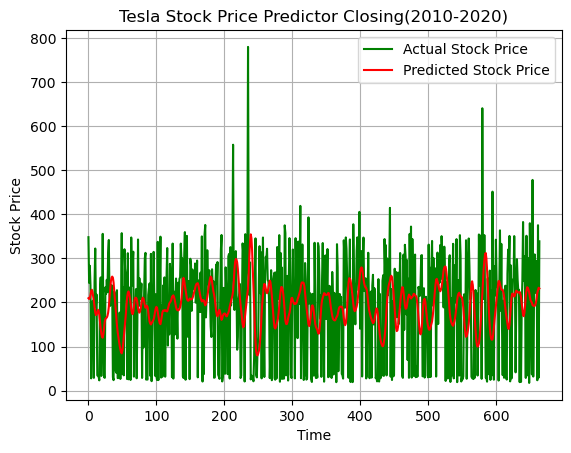

In [28]:
plt.plot(y_test, color = 'green', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Tesla Stock Price Predictor Closing(2010-2020)')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.legend()

plt.grid()
plt.show()